In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [2]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
g2 = -15#-21
g5 = 50
Dt2 = -2.3#3.5
Dt3=0
Dtp = 10.5#35.5

In [3]:
def getBMatrixAB(kx, ky, Dt, mu, xi):
    v0 = -0.5 * np.sqrt(3) * g0
    v3 = -0.5 * np.sqrt(3) * g3
    v4 = -0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [v0*p, (Dt + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [-v4*p, g1*idt, (-Dt + Dtp - mu)*idt, v0*pc],
                   [-v3*pc, -v4 * p, v0*p, (-Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])


def getBMatrixABA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt],
                   [-v4*p, g1*idt, (-2*Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt],
                   [-v3*pc, -v4 * p, v0*p, (-2*Dt2 - mu)*idt, -v3*pc, -v4*p],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(Dt2 - Dt - mu)*idt, v0*pc],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (Dt2 - Dt + Dtp - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABAB(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Dt2 = 0
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt, 0.5*g5*idt, 0*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 - mu)*idt, -v3*pc, -v4*p, 0*idt, 0.5*g2*idt],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(-Dt/3 + Dt3 - Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0.5*g5*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0.5*g2*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])


def getBMatrixABAC(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Dt2 = 0
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0.5*g2*idt, 0*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0.5*g5*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt, 0*idt, 0*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 - mu)*idt, -v3*pc, -v4*p, 0.5*g2*idt, 0*idt],
                   [0.5*g2*idt, 0*idt, -v4*pc, -v3*p,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*p, g1*idt],
                   [0*idt, 0.5*g5*idt, g1*idt, -v4*pc, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, -v3*pc, -v4*p],
                   [0*idt, 0*idt, 0*idt, 0.5*g2*idt, -v4*pc, -v3*p, (Dt2 - Dt - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, g1*idt, -v4*pc, v0*p, (Dt2 - Dt + Dtp - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [4]:
pauli0=np.eye(2)
pauli1=np.array([[0,1],[1,0]])
pauli2=np.array([[0,-1j],[1j,0]])
pauli3=np.array([[1,0],[0,-1]])

def getBMatrixABC(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (-2*Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [-v3*pc, -v4 * p, v0*p, (-2*Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, -v4*p, g1*idt,(Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABCA(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p =  xi * kx + ky * 1j#np.exp(ky * 1j) + 2.0 * np.exp(-0.5 * ky * 1j) * np.cos(0.5 * np.sqrt(3) * kx)
    pc = xi * kx - ky * 1j#np.conj(p)
    Dt2=0
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt, 0*idt, 0*idt],
                   [v0*p, (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt, 0*idt, 0*idt],
                   [-v4*p, g1*idt, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p, 0*idt, 0.5*g2*idt],
                   [-v3*pc, -v4 * p, v0*p, (Dt/3 - Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc, 0*idt, 0*idt],
                   [0*idt, 0*idt, -v4*p, g1*idt,(-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, v0*pc, -v4*pc, -v3*p],
                   [0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (-Dt/3 + Dt3 - Dt2 + Dtp - mu)*idt, g1*idt, -v4*pc],
                   [0*idt, 0*idt, 0*idt, 0*idt, -v4*p, g1*idt, (Dt2 - Dt + Dtp - mu)*idt, v0*pc],
                   [0*idt, 0*idt, 0.5*g2*idt, 0*idt, -v3*pc, -v4*p, v0*p, (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])


def getBMatrixABCA2(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    zr = np.zeros(kx.shape)
    mat1=np.moveaxis(np.array([[zr,(kx-xi*ky*1j)**4],[(kx+xi*ky*1j)**4,zr]]),[0,1], [-2,-1])
    mat2=np.moveaxis(np.array([[zr,(xi*kx-ky*1j)],[(xi*kx+ky*1j),zr]]),[0,1], [-2,-1])
    mat3=np.moveaxis(np.array([[zr,(kx+xi*ky*1j)**2],[(kx-xi*ky*1j)**2,zr]]),[0,1], [-2,-1])
    kx=kx[:,np.newaxis,np.newaxis]
    ky=ky[:,np.newaxis,np.newaxis]
    ksq = kx**2+ky**2
    Dt2=0
    return ((-Dtp*v0**2*ksq/g1**2+Dt2+(2*v0*v4/g1+v3*v4*g2/g1**2)*ksq)*pauli0+
            Dt*(1+4*v0**2*ksq/(3*g1**2))*pauli3-Dt3*(v0**2*ksq/g1**2)*pauli3-
            (v0**4/g1**3)*mat1
            -(v0*g2/g1)*mat2-(v3**2/g1)*mat3+
            ((2*v0*v3*v4/g1**2)+(v0**2*v4*g2/g1**3))*xi*(kx**3-3*kx*ky**2)*pauli0-
           ((3*v0**2*v3/g1**2)+(v0**3*g2/g1**3)+(2*v3*v4**2/g1**2)+(v0*v4**2*g2/g1**3))*ksq*(xi*kx*pauli1+ky*pauli2))

def getBMatrixABCA2S(kx, ky, Dt, mu, xi, BP1=1, BP2=1, BP4=1, TW=1):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    zr = np.zeros(kx.shape)
    mat1=np.moveaxis(np.array([[zr,(kx-xi*ky*1j)**4],[(kx+xi*ky*1j)**4,zr]]),[0,1], [-2,-1])
    mat2=np.moveaxis(np.array([[zr,(xi*kx-ky*1j)],[(xi*kx+ky*1j),zr]]),[0,1], [-2,-1])
    mat3=np.moveaxis(np.array([[zr,(kx+xi*ky*1j)**2],[(kx-xi*ky*1j)**2,zr]]),[0,1], [-2,-1])
    kx=kx[:,:,np.newaxis,np.newaxis]
    ky=ky[:,:,np.newaxis,np.newaxis]
    ksq = kx**2+ky**2
    Dt2=0
    return ((-Dtp*v0**2*ksq/g1**2+Dt2+2*v0*v4*ksq/g1)*pauli0+
            Dt*(1+4*v0**2*ksq/(3*g1**2))*pauli3-Dt3*(v0**2*ksq/g1**2)*pauli3-
            BP4*(v0**4/g1**3)*mat1
            -BP1*(v0*g2/g1)*mat2-BP2*(v3**2/g1)*mat3+
            TW*((2*v0*v3*v4/g1**2)+(v0**2*v4*g2/g1**3))*xi*(kx**3-3*kx*ky**2)*pauli0-
           BP1*((3*v0**2*v3/g1**2)+(v0**3*g2/g1**3))*ksq*(xi*kx*pauli1+ky*pauli2))

In [43]:
v0 = 0.5 * np.sqrt(3) * g0
v3 = 0.5 * np.sqrt(3) * g3
v4 = 0.5 * np.sqrt(3) * g4
2*v0**2/g1**2
#print((v0**3/g1**2))
#print((v0**4/g1**3)*0.01**4)
#print((v3**2/g1)*0.01**2)

99.82686980609418

In [44]:
np.linalg.eigh(getBMatrixABCA(4*np.pi/(3*np.sqrt(3))-0.055, 0, 60, 0.0, 1))[0]

array([-6650.53553221, -6493.73878035, -6268.85500386, -6047.01416392,
        5723.88371261,  6151.87794319,  6638.81133702,  7008.57048752])

In [114]:
kx=np.linspace(-0.1,0.1,2000)
ky=np.linspace(-0.1,0.1,2000)
w,v=np.linalg.eigh(getBMatrixABAB(kx, ky, 20, 0.0, 1))
w2,v2=np.linalg.eigh(getBMatrixABAB(kx, ky, -20, 0.0, -1))

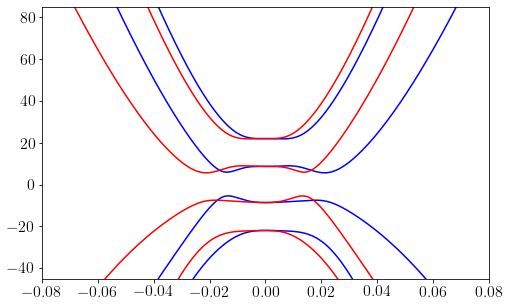

In [115]:
ml.rcParams['figure.figsize'] = (8.0, 5.0)
plt.plot(kx,w,'b')
plt.plot(kx,w2,'r')
#plt.plot(kx,18*np.ones(kx.shape),'k')
plt.ylim([-45,85])
plt.xlim([-0.08,0.08])
plt.show()

In [15]:
160*0.25

40.0

In [110]:
kx=np.linspace(-0.1,0.1,2000)
ky=np.zeros(kx.shape)
wAB,v=np.linalg.eigh(getBMatrixAB(kx, ky, 60, 0.0, 1))
wABA,v=np.linalg.eigh(getBMatrixABA(kx, ky, 60, 0.0, 1))
wABC,v=np.linalg.eigh(getBMatrixABC(kx, ky, 60, 0.0, 1))
wABAB,v=np.linalg.eigh(getBMatrixABAB(kx, ky, 20, 0.0, 1))
wABCA,v=np.linalg.eigh(getBMatrixABCA(kx, ky, 20, 0.0, 1))
wABACp,v=np.linalg.eigh(getBMatrixABAC(kx, ky, 20, 0.0, 1))
wABACn,v=np.linalg.eigh(getBMatrixABAC(kx, ky, -20, 0.0, 1))

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


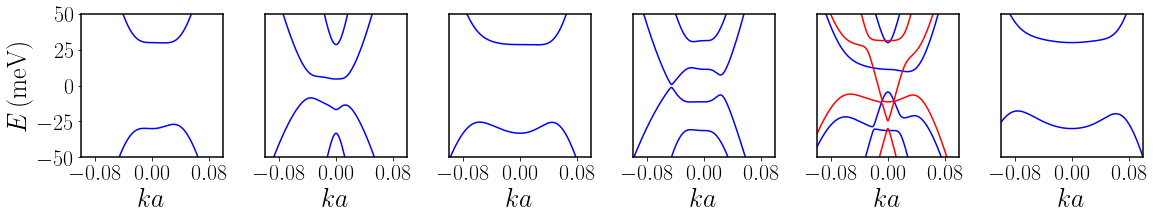

In [62]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=22)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (16.5, 3.5)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 6)

ax1=fig.add_subplot(gs[0,0])
ax1.plot(kx, wAB,'b')
ax1.set_xlim([-0.1,0.1])
ax1.set_ylim([-50,50])
ax1.set_xlabel(r'$ka$',fontsize=26)
ax1.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax1.set_xticks([-0.08,0.0,0.08])
ax1.set_yticks([-50,-25,0,25,50])

ax2=fig.add_subplot(gs[0,1])
ax2.plot(kx, wABA,'b')
ax2.set_xlim([-0.1,0.1])
ax2.set_ylim([-50,50])
ax2.set_xlabel(r'$ka$',fontsize=26)
ax2.set_xticks([-0.08,0.0,0.08])
ax2.set_yticks([])

ax3=fig.add_subplot(gs[0,2])
ax3.plot(kx, wABC,'b')
ax3.set_xlim([-0.1,0.1])
ax3.set_ylim([-50,50])
ax3.set_xlabel(r'$ka$',fontsize=26)
ax3.set_xticks([-0.08,0.0,0.08])
ax3.set_yticks([])

ax4=fig.add_subplot(gs[0,3])
ax4.plot(kx, wABAB,'b')
ax4.set_xlim([-0.1,0.1])
ax4.set_ylim([-50,50])
ax4.set_xlabel(r'$ka$',fontsize=26)
ax4.set_xticks([-0.08,0.0,0.08])
ax4.set_yticks([])

ax5=fig.add_subplot(gs[0,4])
ax5.plot(kx, wABACp,'b')
ax5.plot(kx, wABACn,'r')
ax5.set_xlim([-0.1,0.1])
ax5.set_ylim([-50,50])
ax5.set_xlabel(r'$ka$',fontsize=26)
ax5.set_xticks([-0.08,0.0,0.08])
ax5.set_yticks([])

ax6=fig.add_subplot(gs[0,5])
ax6.plot(kx, wABCA,'b')
ax6.set_xlim([-0.1,0.1])
ax6.set_ylim([-50,50])
ax6.set_xlabel(r'$ka$',fontsize=26)
ax6.set_xticks([-0.08,0.0,0.08])
ax6.set_yticks([])

plt.tight_layout()
plt.savefig('EnDisp.pdf')

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


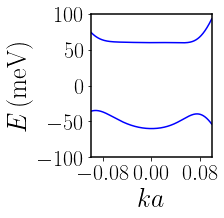

In [118]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=22)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (3.5, 3.5)
fig = plt.figure(constrained_layout=True)
ax1=fig.subplots(1,1)


#ax1=fig.add_subplot(gs[0,0])
ax1.plot(kx, wABCA,'b')
#ax1.plot(kx, wABACn,'r')
ax1.set_xlim([-0.1,0.1])
ax1.set_ylim([-100,100])
ax1.set_xlabel(r'$ka$',fontsize=26)
ax1.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax1.set_xticks([-0.08,0.0,0.08])
ax1.set_yticks([-100,-50,0,50,100])

plt.tight_layout()
plt.savefig('EnDisp.pdf')

In [6]:
kx=np.linspace(-0.15,0.15,2000)
ky=np.zeros(kx.shape)
w1,_=np.linalg.eigh(getBMatrixABC(kx, ky, 0, 0.0, 1))
w2,_=np.linalg.eigh(getBMatrixABC(kx, ky, 10, 0.0, 1))
w3,_=np.linalg.eigh(getBMatrixABC(kx, ky, 30, 0.0, 1))
w4,_=np.linalg.eigh(getBMatrixABC(kx, ky, 60, 0.0, 1))
w5,_=np.linalg.eigh(getBMatrixABC(kx, ky, 100, 0.0, 1))
w6,_=np.linalg.eigh(getBMatrixABC(kx, ky, 120, 0.0, 1))

#w1s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 0, 0.0, 1))
#w2s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 10, 0.0, 1))
#w3s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 30, 0.0, 1))
#w4s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 60, 0.0, 1))
#w5s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 100, 0.0, 1))
#w6s,_=np.linalg.eigh(getBMatrixABCA2S(kx, ky, 120, 0.0, 1))

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:74: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


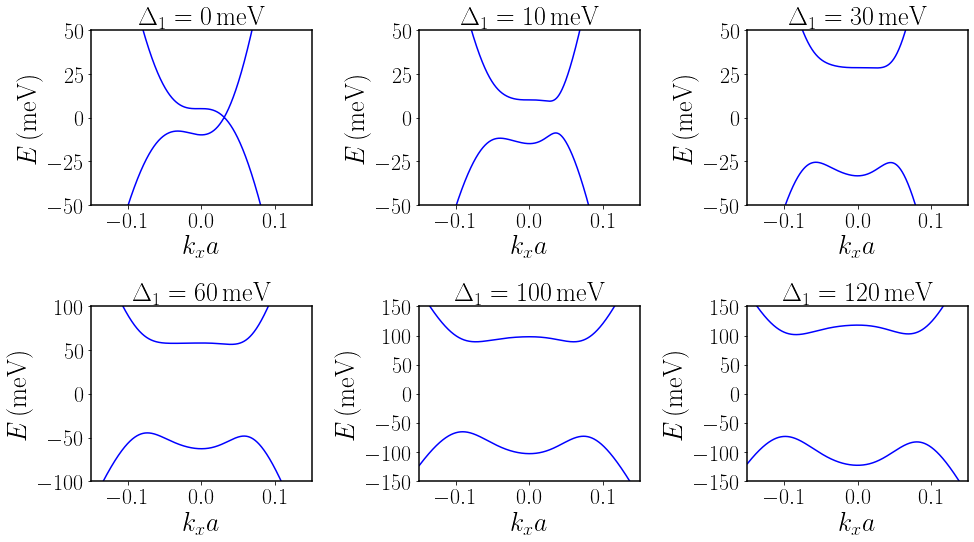

In [7]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=22)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (14, 8)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 3)

ax1=fig.add_subplot(gs[0,0])
ax1.plot(kx, w1,'b')
#ax1.plot(kx, w1s,'r')
ax1.set_xlim([-0.15,0.15])
ax1.set_ylim([-50,50])
ax1.set_xlabel(r'$k_xa$',fontsize=26)
ax1.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax1.set_title(r'$\Delta_1=0\,\mathrm{meV}$',fontsize=26)
ax1.set_xticks([-0.1,0.0,0.1])
ax1.set_yticks([-50,-25,0,25,50])

ax2=fig.add_subplot(gs[0,1])
ax2.plot(kx, w2,'b')
#ax2.plot(kx, w2s,'r')
ax2.set_xlim([-0.15,0.15])
ax2.set_ylim([-50,50])
ax2.set_xlabel(r'$k_xa$',fontsize=26)
ax2.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax2.set_title(r'$\Delta_1=10\,\mathrm{meV}$',fontsize=26)
ax2.set_xticks([-0.1,0.0,0.1])
ax2.set_yticks([-50,-25,0,25,50])

ax3=fig.add_subplot(gs[0,2])
ax3.plot(kx, w3,'b')
#ax3.plot(kx, w3s,'r')
ax3.set_xlim([-0.15,0.15])
ax3.set_ylim([-50,50])
ax3.set_xlabel(r'$k_xa$',fontsize=26)
ax3.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax3.set_title(r'$\Delta_1=30\,\mathrm{meV}$',fontsize=26)
ax3.set_xticks([-0.1,0.0,0.1])
ax3.set_yticks([-50,-25,0,25,50])

ax4=fig.add_subplot(gs[1,0])
ax4.plot(kx, w4,'b')
#ax4.plot(kx, w4s,'r')
ax4.set_xlim([-0.15,0.15])
ax4.set_ylim([-100,100])
ax4.set_xlabel(r'$k_xa$',fontsize=26)
ax4.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax4.set_title(r'$\Delta_1=60\,\mathrm{meV}$',fontsize=26)
ax4.set_xticks([-0.1,0.0,0.1])
ax4.set_yticks([-100,-50,0,50,100])

ax5=fig.add_subplot(gs[1,1])
ax5.plot(kx, w5,'b')
#ax5.plot(kx, w5s,'r')
ax5.set_xlim([-0.15,0.15])
ax5.set_ylim([-150,150])
ax5.set_xlabel(r'$k_xa$',fontsize=26)
ax5.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax5.set_title(r'$\Delta_1=100\,\mathrm{meV}$',fontsize=26)
ax5.set_xticks([-0.1,0.0,0.1])
ax5.set_yticks([-150,-100,-50,0,50,100,150])

ax6=fig.add_subplot(gs[1,2])
ax6.plot(kx, w6,'b')
#ax6.plot(kx, w6s,'r')
ax6.set_xlim([-0.15,0.15])
ax6.set_ylim([-150,150])
ax6.set_xlabel(r'$k_xa$',fontsize=26)
ax6.set_ylabel(r'$E\,(\mathrm{meV})$',fontsize=26)
ax6.set_title(r'$\Delta_1=120\,\mathrm{meV}$',fontsize=26)
ax6.set_xticks([-0.1,0.0,0.1])
ax6.set_yticks([-150,-100,-50,0,50,100,150])

plt.tight_layout()
plt.savefig("EnergyProgressionABC.pdf")

In [155]:
kx=np.linspace(-0.2,0.2,1200)
Dl=170
#wABC,vABC=np.linalg.eigh(getBMatrixABCA(kx, 0.00, Dl, 0.0, -1))
wABCA,vABCA=np.linalg.eigh(getBMatrixABCA(kx, kx, Dl, 0.0, -1))

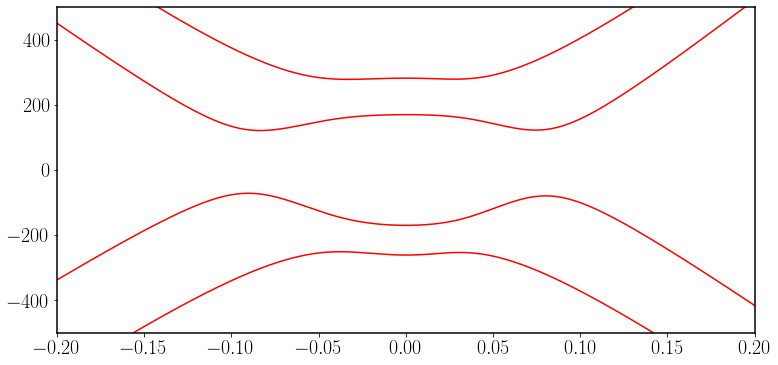

In [156]:
ml.rcParams['figure.figsize'] = (12.5, 6)
#plt.plot(kx,wABC[:,2],'b')
#plt.plot(kx,wABC[:,3],'b')
#plt.plot(kx,wABC[:,1],'b')
#plt.plot(kx,wABC[:,4],'b')
#plt.plot(kx,wABC[:,4],'r')
#plt.plot(kx,wABC[:,1],'r')
plt.plot(kx,wABCA[:,3],'r')
plt.plot(kx,wABCA[:,4],'r')
plt.plot(kx,wABCA[:,2],'r')
plt.plot(kx,wABCA[:,5],'r')
plt.xlim([-0.2,0.2])
plt.ylim([-500,500])
plt.show()

In [145]:
kr = np.linspace(-0.2,0.2, 600)
Dl=69
KX, KY = np.meshgrid(kr, kr)
#w0, v0 = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1))
w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))

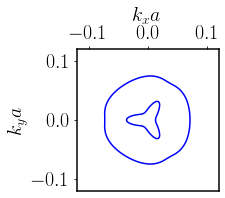

In [148]:
ml.rcParams['figure.figsize'] = (3.5, 3.5)
ml.rc('font', family='serif',size=20)
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['axes.linewidth'] = 1.5 
ind = np.where(np.abs(np.abs(Dl)-DlistABCA1)<0.01)[0][0]
mul=fdrABCA[ind](2.6)
fig, ax= plt.subplots(1,1)
#ax.contour(KX, KY, w0[:,:,1],[mul],colors='b')
#ax.contour(KX, KY, w1[:,:,1],[mul-Dtp],colors='r')
ax.contour(KX, KY, w[:,:,4],[mul],colors='b')
#ax.contour(KX, KY, w[:,:,5],[mul],colors='b')
ax.set_xlim([-0.12,0.12])
ax.set_ylim([-0.12,0.12])
ax.set_xticks([-0.1,0.0,0.1])
ax.set_yticks([-0.1,0.0,0.1])
ax.set_xlabel(r'$k_xa$')
ax.set_ylabel(r'$k_ya$')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set(adjustable='box', aspect='equal')
plt.tight_layout()
plt.savefig("FS.pdf")

In [29]:
kr = np.linspace(-0.2,0.2, 600)
Dl=12
KX, KY = np.meshgrid(kr, kr)
w0, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1))
w1, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1,TW=0))
w2, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1,BP1=0))
w3, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1,BP2=0))
w4, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1,BP1=0,TW=0))
w5, _ = np.linalg.eigh(getBMatrixABCA2S(KX, KY, Dl, 0.0, 1,BP1=0,BP2=0,TW=0))

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


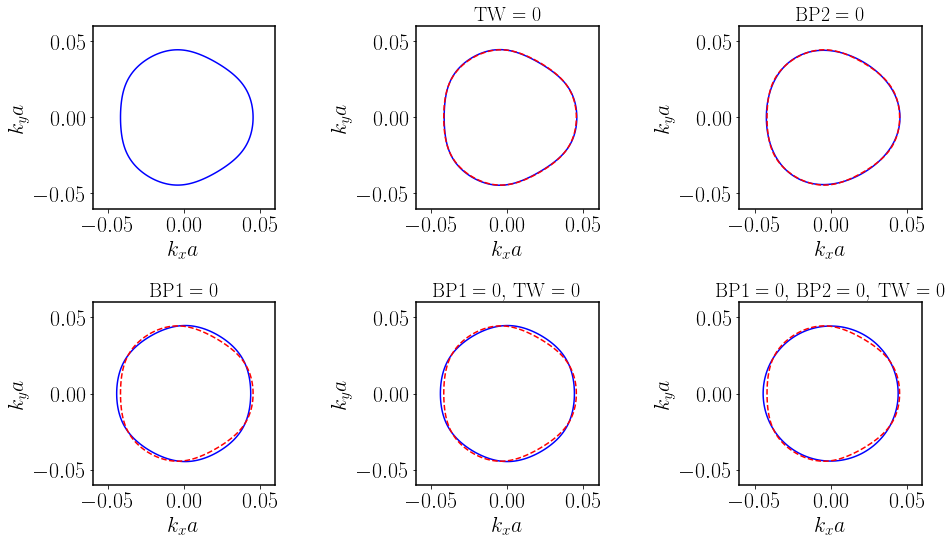

In [37]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=22)
ml.rcParams['axes.linewidth'] = 1.5
ml.rcParams['figure.figsize'] = (14, 8)
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 3)


ind = np.where(np.abs(np.abs(Dl)-DlistABCA)<0.01)[0][0]
mul=fdrABCA[ind](1.1)

ax1=fig.add_subplot(gs[0,0])
ax1.contour(KX, KY, w0[:,:,1],[mul],colors='b')
ax1.set_xlim([-0.06,0.06])
ax1.set_ylim([-0.06,0.06])
ax1.set_xticks([-0.05,0.0,0.05])
ax1.set_yticks([-0.05,0.0,0.05])
ax1.set_xlabel(r'$k_xa$')
ax1.set_ylabel(r'$k_ya$')
ax1.set(adjustable='box', aspect='equal')

ax2=fig.add_subplot(gs[0,1])
ax2.contour(KX, KY, w1[:,:,1],[mul],colors='b')
ax2.contour(KX, KY, w0[:,:,1],[mul],colors='r',linestyles='dashed')
ax2.set_xlim([-0.06,0.06])
ax2.set_ylim([-0.06,0.06])
ax2.set_xticks([-0.05,0.0,0.05])
ax2.set_yticks([-0.05,0.0,0.05])
ax2.set_xlabel(r'$k_xa$')
ax2.set_ylabel(r'$k_ya$')
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r'$\mathrm{TW}=0$',fontsize=20)

ax3=fig.add_subplot(gs[0,2])
ax3.contour(KX, KY, w3[:,:,1],[mul],colors='b')
ax3.contour(KX, KY, w0[:,:,1],[mul],colors='r',linestyles='dashed')
ax3.set_xlim([-0.06,0.06])
ax3.set_ylim([-0.06,0.06])
ax3.set_xticks([-0.05,0.0,0.05])
ax3.set_yticks([-0.05,0.0,0.05])
ax3.set_xlabel(r'$k_xa$')
ax3.set_ylabel(r'$k_ya$')
ax3.set(adjustable='box', aspect='equal')
ax3.set_title(r'$\mathrm{BP2}=0$',fontsize=20)

ax4=fig.add_subplot(gs[1,0])
ax4.contour(KX, KY, w2[:,:,1],[mul],colors='b')
ax4.contour(KX, KY, w0[:,:,1],[mul],colors='r',linestyles='dashed')
ax4.set_xlim([-0.06,0.06])
ax4.set_ylim([-0.06,0.06])
ax4.set_xticks([-0.05,0.0,0.05])
ax4.set_yticks([-0.05,0.0,0.05])
ax4.set_xlabel(r'$k_xa$')
ax4.set_ylabel(r'$k_ya$')
ax4.set(adjustable='box', aspect='equal')
ax4.set_title(r'$\mathrm{BP1}=0$',fontsize=20)

ax5=fig.add_subplot(gs[1,1])
ax5.contour(KX, KY, w4[:,:,1],[mul],colors='b')
ax5.contour(KX, KY, w0[:,:,1],[mul],colors='r',linestyles='dashed')
ax5.set_xlim([-0.06,0.06])
ax5.set_ylim([-0.06,0.06])
ax5.set_xticks([-0.05,0.0,0.05])
ax5.set_yticks([-0.05,0.0,0.05])
ax5.set_xlabel(r'$k_xa$')
ax5.set_ylabel(r'$k_ya$')
ax5.set(adjustable='box', aspect='equal')
ax5.set_title(r'$\mathrm{BP1}=0,\,\mathrm{TW}=0$',fontsize=20)

ax6=fig.add_subplot(gs[1,2])
ax6.contour(KX, KY, w5[:,:,1],[mul],colors='b')
ax6.contour(KX, KY, w0[:,:,1],[mul],colors='r',linestyles='dashed')
ax6.set_xlim([-0.06,0.06])
ax6.set_ylim([-0.06,0.06])
ax6.set_xticks([-0.05,0.0,0.05])
ax6.set_yticks([-0.05,0.0,0.05])
ax6.set_xlabel(r'$k_xa$')
ax6.set_ylabel(r'$k_ya$')
ax6.set(adjustable='box', aspect='equal')
ax6.set_title(r'$\mathrm{BP1}=0,\,\mathrm{BP2}=0,\,\mathrm{TW}=0$',fontsize=20)

plt.tight_layout()
plt.savefig('FSEffective2.pdf')

In [30]:
mul

array(16.97238101)

In [5]:
dpath = "/home/aghazary/Documents/StonerABCAData/"
with open(dpath+'U0.0KV0.0KDataABCAGrapheneABCT01.npy', 'rb') as f:
    a4ABCA = np.load(f)
dmu = 0.002
DlistABCA =3*np.arange(0,40.1,0.25)
mulABCA = np.arange(-150,150.0001,dmu)
mulABCA = mulABCA[1:-1]
nuTABCA = a4ABCA[:,1:-1]
dosABCA = (a4ABCA[:,2:]-a4ABCA[:,0:-2]) / (2*dmu)
fdtABCA = np.array([interp1d(nuTABCA[i], dosABCA[i], kind='linear') for i in range(len(nuTABCA))])
fdrABCA = np.array([interp1d(nuTABCA[i], mulABCA, kind='linear') for i in range(len(nuTABCA))])

In [40]:
dpath = "/home/aghazary/Documents/StonerABCAData/"
with open(dpath+'U0.0KV0.0KDataABCAGrapheneABCZoom6080.npy', 'rb') as f:
    a4ABCA1 = np.load(f)
dmu = 0.002
DlistABCA1 =np.arange(60,80.1,0.125)#np.arange(0,120.1,0.5)
mulABCA1 = np.arange(-150,150.0001,dmu)
mulABCA1 = mulABCA1[1:-1]
nuTABCA1 = a4ABCA1[:,1:-1]
dosABCA1 = (a4ABCA1[:,2:]-a4ABCA1[:,0:-2]) / (2*dmu)
fdtABCA1 = np.array([interp1d(nuTABCA1[i], dosABCA1[i], kind='linear') for i in range(len(nuTABCA1))])
fdrABCA = np.array([interp1d(nuTABCA1[i], mulABCA1, kind='linear') for i in range(len(nuTABCA1))])

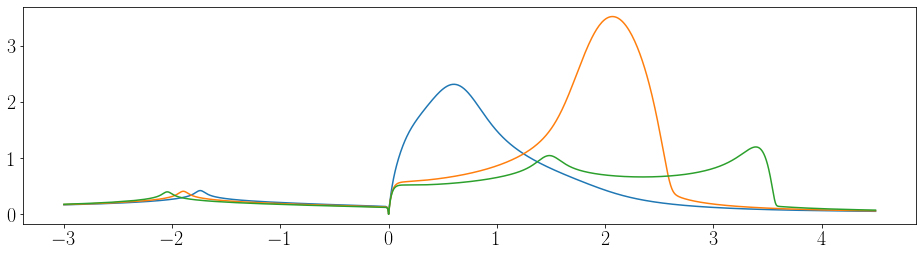

In [54]:
ml.rcParams['figure.figsize'] = (16.0, 4.0)
nul = np.arange(-3.0,4.5,0.001)
plt.plot(nul, Au*0.1*fdtABCA[78](nul))
plt.plot(nul, Au*0.1*fdtABCA[89](nul))
plt.plot(nul, Au*0.1*fdtABCA[100](nul))

In [121]:
Dlist

array([60.   , 60.125, 60.25 , 60.375, 60.5  , 60.625, 60.75 , 60.875,
       61.   , 61.125, 61.25 , 61.375, 61.5  , 61.625, 61.75 , 61.875,
       62.   , 62.125, 62.25 , 62.375, 62.5  , 62.625, 62.75 , 62.875,
       63.   , 63.125, 63.25 , 63.375, 63.5  , 63.625, 63.75 , 63.875,
       64.   , 64.125, 64.25 , 64.375, 64.5  , 64.625, 64.75 , 64.875,
       65.   , 65.125, 65.25 , 65.375, 65.5  , 65.625, 65.75 , 65.875,
       66.   , 66.125, 66.25 , 66.375, 66.5  , 66.625, 66.75 , 66.875,
       67.   , 67.125, 67.25 , 67.375, 67.5  , 67.625, 67.75 , 67.875,
       68.   , 68.125, 68.25 , 68.375, 68.5  , 68.625, 68.75 , 68.875,
       69.   , 69.125, 69.25 , 69.375, 69.5  , 69.625, 69.75 , 69.875,
       70.   , 70.125, 70.25 , 70.375, 70.5  , 70.625, 70.75 , 70.875,
       71.   , 71.125, 71.25 , 71.375, 71.5  , 71.625, 71.75 , 71.875,
       72.   , 72.125, 72.25 , 72.375, 72.5  , 72.625, 72.75 , 72.875,
       73.   , 73.125, 73.25 , 73.375, 73.5  , 73.625, 73.75 , 73.875,
      

57


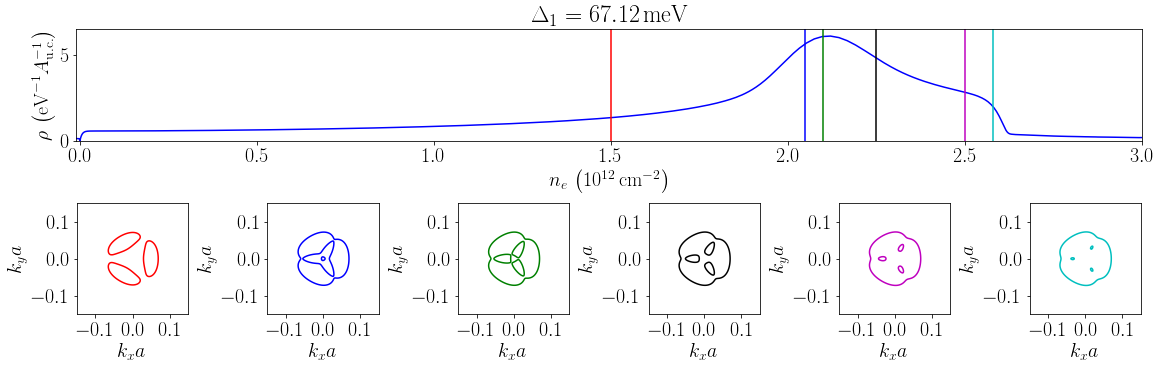

In [136]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (16.0, 5.0)
ml.rc('font', family='serif',size=20)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
nul = np.arange(-4.5,5,0.001)
a=2.46
Au = np.sqrt(3) * a**2 / 2

Dlist=DlistABCA1
fdt=fdtABCA1
mul=mulABCA1
nuT=nuTABCA1


Dl = 67.125
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
print(ind)
ax1.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$')
ax1.plot(nul, Au*0.1*fdt[ind](nul),'b')
ax1.set_xlim([-0.01,3.0])
ax1.set_ylim([0,6.5])
ax1.set_title('$\Delta_1=%.2f\,\mathrm{meV}$' %(Dl))

kr = np.linspace(-0.15,0.15, 300)
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))
nu1=1.5
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax4 = fig.add_subplot(gs[1, 0])
ax4.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='r')
ax4.set_xlabel(r'$k_xa$')
ax4.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"r")
ax4.set(adjustable='box', aspect='equal')

nu1=2.05
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax5 = fig.add_subplot(gs[1, 1])
ax5.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='b')
ax5.set_xlabel(r'$k_xa$')
ax5.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"b")
ax5.set(adjustable='box', aspect='equal')

nu1=2.1
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax6 = fig.add_subplot(gs[1, 2])
ax6.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='g')
ax6.set_xlabel(r'$k_xa$')
ax6.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"g")
ax6.set(adjustable='box', aspect='equal')

nu1=2.25
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax7 = fig.add_subplot(gs[1, 3])
ax7.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='k')
ax7.set_xlabel(r'$k_xa$')
ax7.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"k")
ax7.set(adjustable='box', aspect='equal')

nu1=2.5
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax8 = fig.add_subplot(gs[1, 4])
ax8.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='m')
ax8.set_xlabel(r'$k_xa$')
ax8.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"m")
ax8.set(adjustable='box', aspect='equal')

nu1=2.58
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax9 = fig.add_subplot(gs[1, 5])
ax9.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='c')
ax9.set_xlabel(r'$k_xa$')
ax9.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,6.5],"c")
ax9.set(adjustable='box', aspect='equal')
plt.savefig("FSABCA.png",dpi=200)

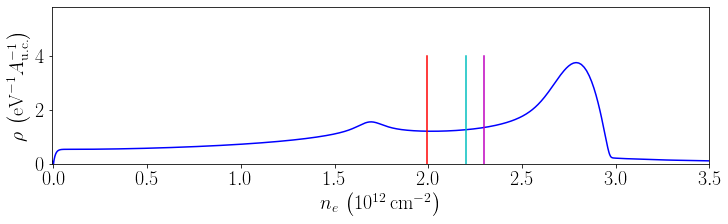

In [13]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (10.0, 3.0)
ml.rc('font', family='serif',size=20)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 4, figure=fig)
nul = np.arange(-4.5,5,0.001)
a=2.46
Au = np.sqrt(3) * a**2 / 2

Dlist=DlistABCA
fdt=fdtABCA
mul=mulABCA
nuT=nuTABCA

Dl = 3*23.25
ax1 = fig.add_subplot(gs[0, :])
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
ax1.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$')
ax1.plot(nul, Au*0.1*fdt[ind](nul),'b')
ax1.set_xlim([-0.01,3.5])
ax1.set_ylim([0,5.8])

nu1=1.995
ax1.plot([nu1,nu1], [0,4],"r")
nu1=2.2
ax1.plot([nu1,nu1], [0,4],"c")
nu1=2.3
ax1.plot([nu1,nu1], [0,4],"m")
#plt.savefig("FSABCA.pdf")

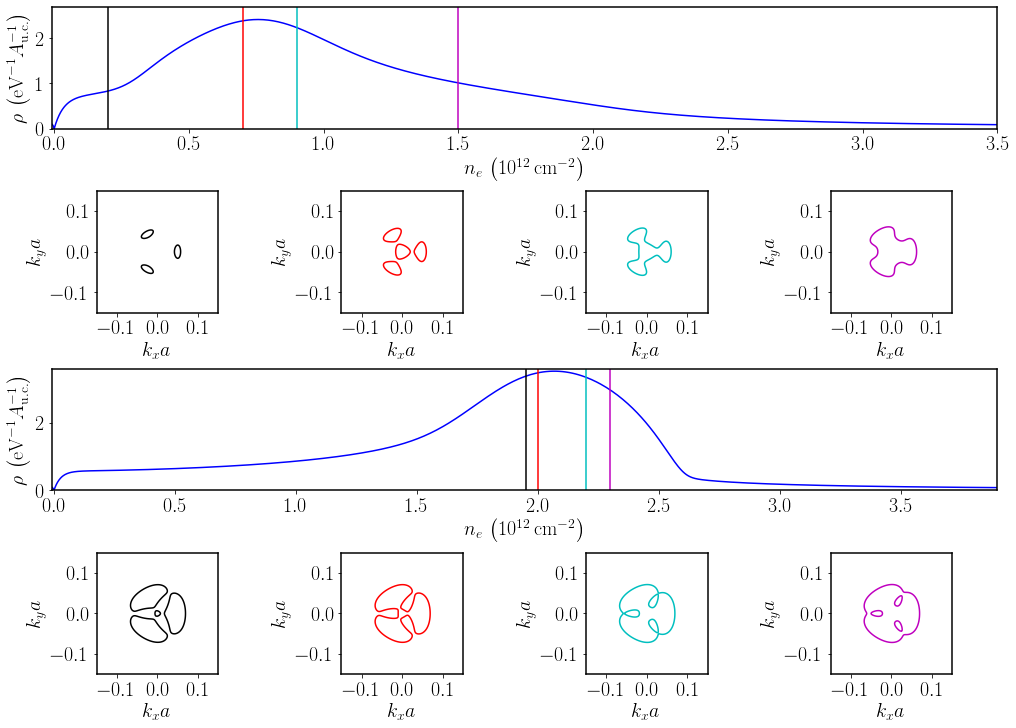

In [45]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (14.0, 10.0)
ml.rc('font', family='serif',size=20)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(4, 4, figure=fig)
nul = np.arange(-4.5,5,0.001)
a=2.46
Au = np.sqrt(3) * a**2 / 2

Dlist=DlistABCA
fdt=fdtABCA
mul=mulABCA
nuT=nuTABCA


Dl = 60
ax1 = fig.add_subplot(gs[0, :])
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
ax1.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$')
ax1.plot(nul, Au*0.1*fdt[ind](nul),'b')
ax1.set_xlim([-0.01,3.5])
ax1.set_ylim([0,2.7])
#ax1.set_title('$\Delta_1=%.2f\,\mathrm{meV}$' %(Dl))

kr = np.linspace(-0.15,0.15, 300)
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))

nu1=0.2
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax2 = fig.add_subplot(gs[1, 0])
ax2.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='k')
ax2.set_xlabel(r'$k_xa$')
ax2.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,4],"k")
ax2.set(adjustable='box', aspect='equal')

nu1=0.7
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax3 = fig.add_subplot(gs[1, 1])
ax3.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='r')
ax3.set_xlabel(r'$k_xa$')
ax3.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,4],"r")
ax3.set(adjustable='box', aspect='equal')

nu1=0.9
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax4 = fig.add_subplot(gs[1, 2])
ax4.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='c')
ax4.set_xlabel(r'$k_xa$')
ax4.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,4],"c")
ax4.set(adjustable='box', aspect='equal')

nu1=1.5
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax5 = fig.add_subplot(gs[1, 3])
ax5.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='m')
ax5.set_xlabel(r'$k_xa$')
ax5.set_ylabel(r'$k_ya$')
ax1.plot([nu1,nu1], [0,4],"m")
ax5.set(adjustable='box', aspect='equal')


Dl = 3*22.25
ax6 = fig.add_subplot(gs[2, :])
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
ax6.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax6.set_ylabel(r'$\rho\, \left({\rm eV}^{-1} A^{-1}_{\rm u.c.}\right)$')
ax6.plot(nul, Au*0.1*fdt[ind](nul),'b')
ax6.set_xlim([-0.01,3.9])
ax6.set_ylim([0,3.6])
#ax6.set_title('$\Delta_1=%.2f\,\mathrm{meV}$' %(Dl))

w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))

nu1=1.95
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax7 = fig.add_subplot(gs[3, 0])
ax7.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='k')
ax7.set_xlabel(r'$k_xa$')
ax7.set_ylabel(r'$k_ya$')
ax6.plot([nu1,nu1], [0,4],"k")
ax7.set(adjustable='box', aspect='equal')

nu1=2.0
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax8 = fig.add_subplot(gs[3, 1])
ax8.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='r')
ax8.set_xlabel(r'$k_xa$')
ax8.set_ylabel(r'$k_ya$')
ax6.plot([nu1,nu1], [0,4],"r")
ax8.set(adjustable='box', aspect='equal')

nu1=2.2
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax9 = fig.add_subplot(gs[3, 2])
ax9.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='c')
ax9.set_xlabel(r'$k_xa$')
ax9.set_ylabel(r'$k_ya$')
ax6.plot([nu1,nu1], [0,4],"c")
ax9.set(adjustable='box', aspect='equal')

nu1=2.3
mu1i = np.where(nu1<=nuT[ind])[0][0]
ax10 = fig.add_subplot(gs[3, 3])
ax10.contour(KX, KY, w[:,:,4 if nu1 > 0 else 3],[mul[mu1i]],colors='m')
ax10.set_xlabel(r'$k_xa$')
ax10.set_ylabel(r'$k_ya$')
ax6.plot([nu1,nu1], [0,4],"m")
ax10.set(adjustable='box', aspect='equal')

plt.savefig("FSABCA.pdf")

In [6]:
U = 15000
V = 4500

In [7]:
a=2.46
dmu = 0.005
mul = np.arange(-150+0.1,150.0001-0.1,dmu)
xrescale = np.sqrt(3) * a**2 * 1E-4/ 2
with open(dpath+'U%.1fKV%.1fKDataABCAT01.npy' 
     % (U / 1000, np.abs(V) / 1000), 'rb') as f:
    a4 = np.load(f)
nuT = np.sum(a4[:,1:-1,:4], axis=2) / xrescale
nu1, nu2, nu3, nu4 = np.transpose(np.sort(a4[:,1:-1,:4], axis=2), (2,0,1)) / xrescale
dos = (np.sum(a4[:,2:,:4], axis=2)-np.sum(a4[:,0:-2,:4], axis=2)) / (2*dmu*xrescale)

In [8]:
from scipy.signal import savgol_filter
doso = dos.copy()
for i in range(len(doso)):
    dos[i] = savgol_filter(doso[i], 15, 3)

IndexError: index 0 is out of bounds for axis 0 with size 0

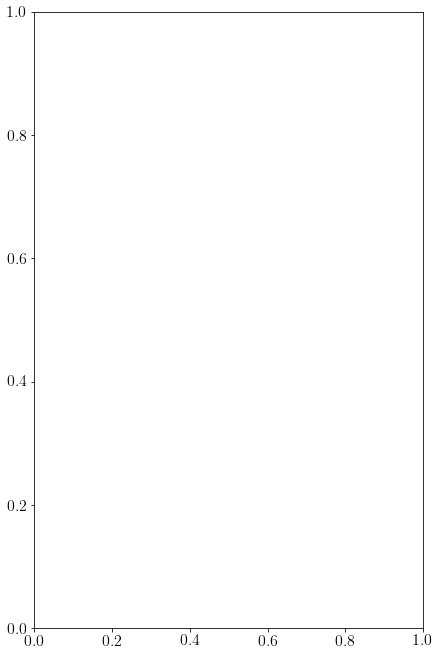

In [9]:
from matplotlib.gridspec import GridSpec
ml.rcParams['figure.figsize'] = (6.0, 9.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)

Dlist=DlistABCA
ax1 = fig.add_subplot(gs[0, 0])
fdt = np.array([interp1d(nuT[i], dos[i], kind='linear') for i in range(len(nuT))])
nul = np.arange(-3.5,3.5,0.001)
Dfl = np.arange(0,40+0.1,0.25)
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Au = np.sqrt(3) * a**2 / 2
Cpl = (10 / Au)*np.array([1/(0.0002+fdt[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 40.0
pc =ax1.pcolormesh(xi,yi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_xlim([Dfl[0]-0.4,Dfl[-1]])
ax1.set_ylim([nul[0],nul[-1]])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$')
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$')
ax1.set_title(r'$U=30\,\mathrm{eV},\,J=-9\,\mathrm{eV}$')
#cbaxes = fig.add_axes([0.86, 0.78, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="vertical",aspect=50)
cbar.ax.tick_params(size=0)

#plt.savefig("Stoner.png", dpi=200)

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


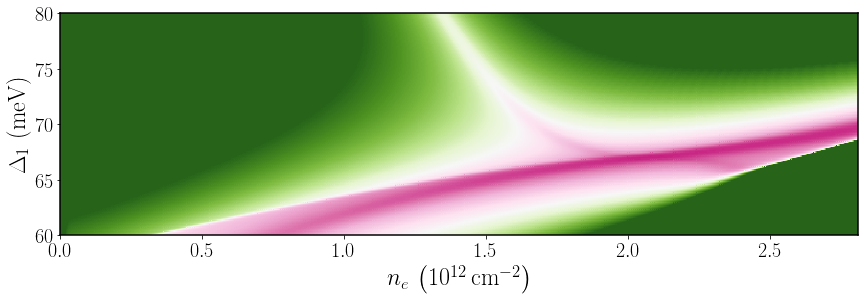

In [109]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (11.9, 4.06)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 1, figure=fig)
Dlist =np.arange(60,80.1,0.125)#3*np.arange(0,40.1,0.25)
ax1 = fig.add_subplot(gs[0, 0])
nul = np.arange(0.0,2.81,0.001)
Dfl = np.arange(60,80.1,0.125)#3*np.arange(0,40+0.1,0.25)
a=2.46
Au = np.sqrt(3) * a**2 / 2
ind = np.where(np.abs(np.abs(Dfl[-1])-Dlist)<0.01)[0][0]
Cpl = (10 / Au)*np.array([1/(0.001+fdtABCA1[i](nul)) for i in range(ind+1)])
vmax = np.amax(Cpl)
vmin = np.amin(Cpl)
cmap = plt.get_cmap('PiYG')
xi, yi = np.meshgrid(Dfl,nul)
vml = 0.0
vxl = 1.5
pc =ax1.pcolormesh(yi,xi,np.transpose(Cpl),cmap=cmap,vmin=vml,vmax=vxl,rasterized=True)
#ax1.scatter(minden[:,0],minden[:,1],s=2.5,color='k')
ax1.set_ylim([60,80])
ax1.set_xlim([nul[0],nul[-1]])
ax1.set_ylabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=24)
ax1.set_xlabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=24)
#ax1.set_title(r'$U=0\,\mathrm{eV}$',fontsize=20)
#ax1.set_title(r'ABCA New',fontsize=20)
#cbaxes = fig.add_axes([0.93, 0.2, 0.01, 0.77])
#cbar=plt.colorbar(pc, orientation="vertical",cax=cbaxes)
#ax1.text(3.1, 66.5, r'$\kappa\,\left({\rm eV} \cdot A_{\rm u.c.}\right)$',rotation=90)
#cbar.ax.set_yticklabels([0.0,'',0.5,'',1.0,'',1.5])
#cbar.ax.tick_params(size=0)
plt.savefig('ABPhase1.pdf', dpi=200)

In [78]:
tt

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 ])

In [165]:
ind = np.where(np.abs(np.abs(26)-Dlist)<0.01)[0][0]

In [12]:
dmu = 0.002
fend=fdrABCA

In [10]:
from matplotlib.gridspec import GridSpec
def PlotDensFermiNu(Dl, NuRange, Nu1, Nu2, Nu3):
    ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
    ml.rcParams['figure.figsize'] = (20.0, 10.0)
    ml.rcParams['contour.negative_linestyle']= 'solid'
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(3, 6, figure=fig)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.set_xlim(NuRange)
    ymin = nu1[ind,np.where(NuRange[0]>nuT[ind])[0][-1]]-0.6
    ymax = nu1[ind,np.where(NuRange[-1]<nuT[ind])[0][0]]+2.0
    ax1.set_ylim(ymin,ymax)
    ax1.set_xlabel(r'$\nu_T,\, 10^{12} {\rm cm}^{-2}$',fontsize=20)
    ax1.set_ylabel(r'$\nu,\, 10^{12} {\rm cm}^{-2}$',fontsize=20)
    ax1.set_title('$\Delta_1=%.2f\,\mathrm{meV},\, U=%.1f\,\mathrm{eV}, J=-%.1f\,\mathrm{eV}$' %(Dl,U/1000,V/1000),fontsize=20)
    ax1.plot(nuT[ind], nu1[ind],"o",label=r"$\nu_1$")
    ax1.plot(nuT[ind], nu2[ind],"+",label=r"$\nu_2$")
    ax1.plot(nuT[ind], nu3[ind],"x",label=r"$\nu_3$")
    ax1.plot(nuT[ind], nu4[ind],"*",label=r"$\nu_4$")
    ax1.plot([Nu1,Nu1], [ymin,ymax],"r")
    ax1.plot([Nu2,Nu2], [ymin,ymax],"g")
    ax1.plot([Nu3,Nu3], [ymin,ymax],"b")
    ax1.legend()
    kr = np.linspace(-0.12,0.12, 400)
    KX, KY = np.meshgrid(kr, kr)
    w, v = np.linalg.eigh(getBMatrixABCA(KX, KY, Dl, 0.0, 1))
    mu1i = np.where(Nu1<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.contour(KX, KY, w[:,:,4 if nu1[ind,mu1i] > 0 else 3],[fend[ind](nu1[ind,mu1i])],colors='r')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu1i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.contour(KX, KY, w[:,:,4 if nu2[ind,mu1i] > 0 else 3],[fend[ind](nu2[ind,mu1i])],colors='r')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu1i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.contour(KX, KY, w[:,:,4 if nu3[ind,mu1i] > 0 else 3],[fend[ind](nu3[ind,mu1i])],colors='r')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu1i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.contour(KX, KY, w[:,:,4 if nu4[ind,mu1i] > 0 else 3],[fend[ind](nu4[ind,mu1i])],colors='r')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu1i]),fontsize=20)
    mu2i = np.where(Nu2<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 2])
    ax2.contour(KX, KY, w[:,:,4 if nu1[ind,mu2i] > 0 else 3],[fend[ind](nu1[ind,mu2i])],colors='g')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu2i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 3])
    ax3.contour(KX, KY, w[:,:,4 if nu2[ind,mu2i] > 0 else 3],[fend[ind](nu2[ind,mu2i])],colors='g')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu2i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 2])
    ax4.contour(KX, KY, w[:,:,4 if nu3[ind,mu2i] > 0 else 3],[fend[ind](nu3[ind,mu2i])],colors='g')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu2i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 3])
    ax5.contour(KX, KY, w[:,:,4 if nu4[ind,mu2i] > 0 else 3],[fend[ind](nu4[ind,mu2i])],colors='g')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu2i]),fontsize=20)
    mu3i = np.where(Nu3<=nuT[ind])[0][0]
    ax2 = fig.add_subplot(gs[1, 4])
    ax2.contour(KX, KY, w[:,:,4 if nu1[ind,mu3i] > 0 else 3],[fend[ind](nu1[ind,mu3i])],colors='b')
    ax2.set_xlabel(r'$k_x$',fontsize=20)
    ax2.set_ylabel(r'$k_y$',fontsize=20)
    ax2.set_title(r'$\nu_1=%.2f $' %(nu1[ind,mu3i]),fontsize=20)
    ax3 = fig.add_subplot(gs[1, 5])
    ax3.contour(KX, KY, w[:,:,4 if nu2[ind,mu3i] > 0 else 3],[fend[ind](nu2[ind,mu3i])],colors='b')
    ax3.set_xlabel(r'$k_x$',fontsize=20)
    ax3.set_ylabel(r'$k_y$',fontsize=20)
    ax3.set_title(r'$\nu_2=%.2f $' %(nu2[ind,mu3i]),fontsize=20)
    ax4 = fig.add_subplot(gs[2, 4])
    ax4.contour(KX, KY, w[:,:,4 if nu3[ind,mu3i] > 0 else 3],[fend[ind](nu3[ind,mu3i])],colors='b')
    ax4.set_xlabel(r'$k_x$',fontsize=20)
    ax4.set_ylabel(r'$k_y$',fontsize=20)
    ax4.set_title(r'$\nu_3=%.2f $' %(nu3[ind,mu3i]),fontsize=20)
    ax5 = fig.add_subplot(gs[2, 5])
    ax5.contour(KX, KY, w[:,:,4 if nu4[ind,mu3i] > 0 else 3],[fend[ind](nu4[ind,mu3i])],colors='b')
    ax5.set_xlabel(r'$k_x$',fontsize=20)
    ax5.set_ylabel(r'$k_y$',fontsize=20)
    ax5.set_title(r'$\nu_4=%.2f $' %(nu4[ind,mu3i]),fontsize=20)
    plt.savefig("Stoner.png",dpi=200)

In [14]:
Dlist

array([  0.  ,   0.75,   1.5 ,   2.25,   3.  ,   3.75,   4.5 ,   5.25,
         6.  ,   6.75,   7.5 ,   8.25,   9.  ,   9.75,  10.5 ,  11.25,
        12.  ,  12.75,  13.5 ,  14.25,  15.  ,  15.75,  16.5 ,  17.25,
        18.  ,  18.75,  19.5 ,  20.25,  21.  ,  21.75,  22.5 ,  23.25,
        24.  ,  24.75,  25.5 ,  26.25,  27.  ,  27.75,  28.5 ,  29.25,
        30.  ,  30.75,  31.5 ,  32.25,  33.  ,  33.75,  34.5 ,  35.25,
        36.  ,  36.75,  37.5 ,  38.25,  39.  ,  39.75,  40.5 ,  41.25,
        42.  ,  42.75,  43.5 ,  44.25,  45.  ,  45.75,  46.5 ,  47.25,
        48.  ,  48.75,  49.5 ,  50.25,  51.  ,  51.75,  52.5 ,  53.25,
        54.  ,  54.75,  55.5 ,  56.25,  57.  ,  57.75,  58.5 ,  59.25,
        60.  ,  60.75,  61.5 ,  62.25,  63.  ,  63.75,  64.5 ,  65.25,
        66.  ,  66.75,  67.5 ,  68.25,  69.  ,  69.75,  70.5 ,  71.25,
        72.  ,  72.75,  73.5 ,  74.25,  75.  ,  75.75,  76.5 ,  77.25,
        78.  ,  78.75,  79.5 ,  80.25,  81.  ,  81.75,  82.5 ,  83.25,
      

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: No contour levels were found within the data range.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: No contour levels were found within the data range.


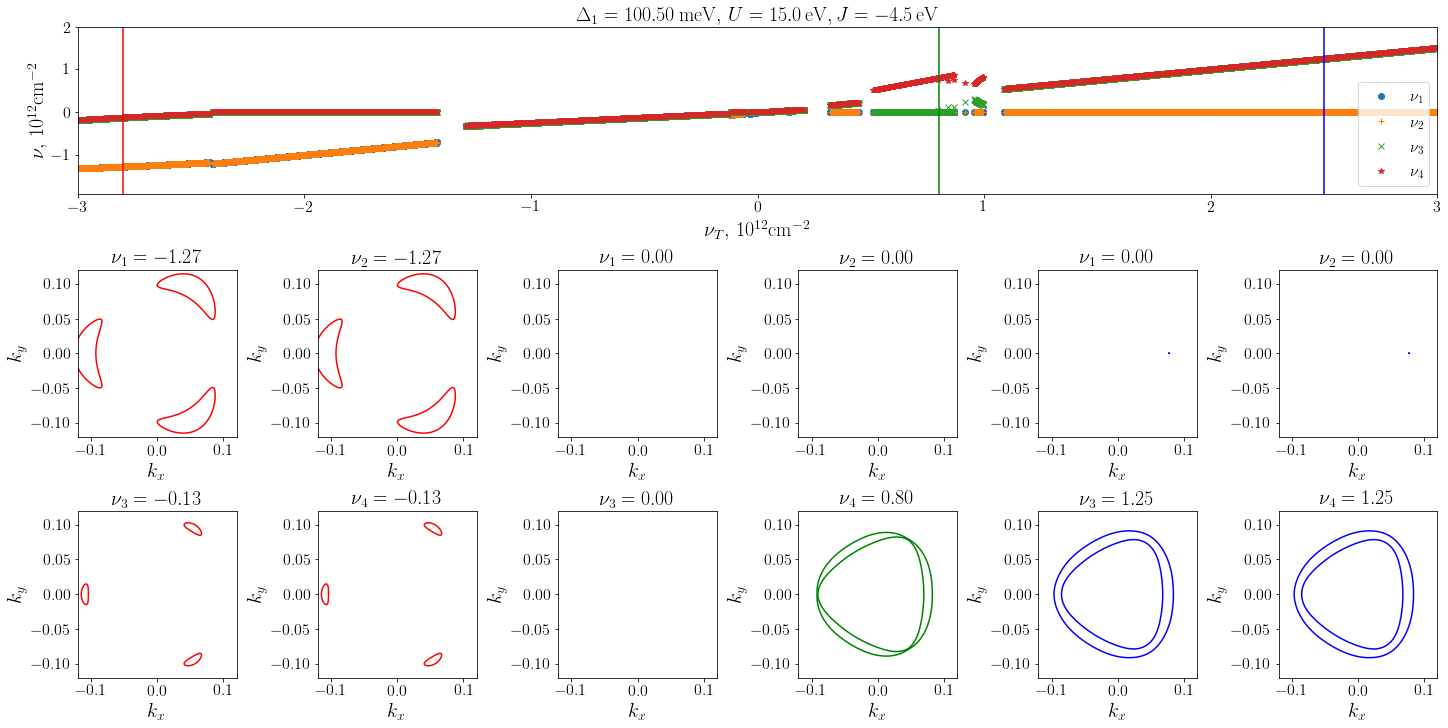

In [27]:
PlotDensFermiNu(100.5, [-3.0, 3.0], -2.8, 0.8, 2.5)

(0.0, 1.0)

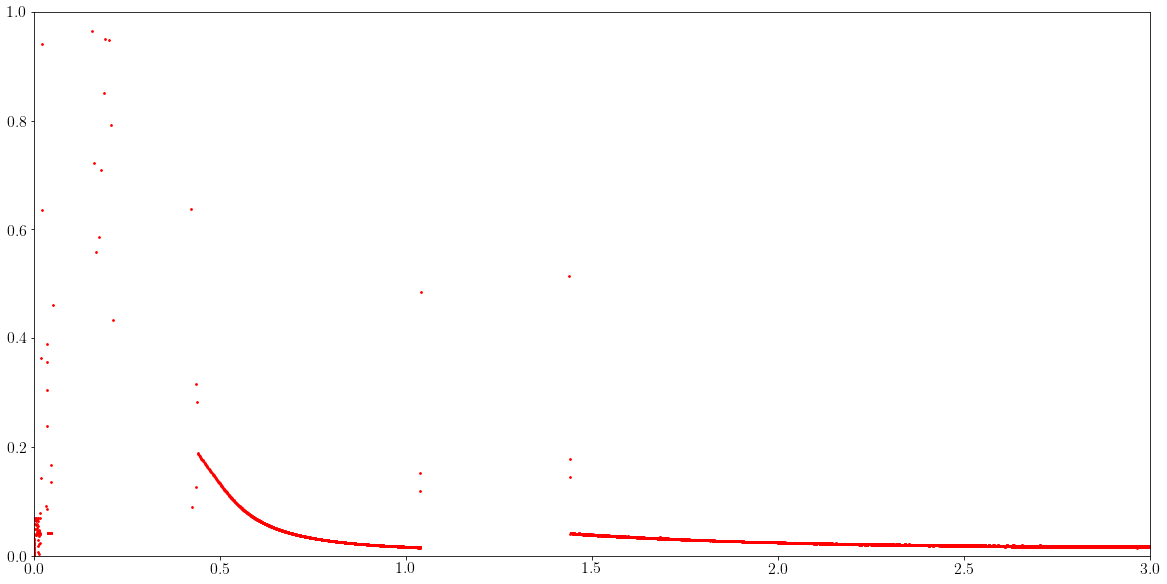

In [63]:
Dl = 20
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
plt.scatter(nuT[ind],Au*0.1*dos[ind],s=3,color='r')
plt.xlim([0,3.0])
plt.ylim([0,1.0])

In [116]:
Dl=20
ind = np.where(np.abs(np.abs(Dl)-Dlist)<0.01)[0][0]
mu1i = np.where(0.8<=nuT[ind])[0][0]

In [117]:
mul[mu1i]

63.919999999805526

In [118]:
nuT[ind,mu1i]

0.80020843850222

In [119]:
fdrABCA[ind](0.8)

array(60.06575125)

In [122]:
fdrrABCA = np.array([interp1d(mulABCA, nuTABCA[i], kind='linear') for i in range(len(nuTABCA))])

In [126]:
fdrrABCA[ind](63.92)/4

0.7999061799473579

In [111]:
nu1[ind,mu1i]

0.0

In [125]:
a4[:,1:-1,:][ind,mu1i]/xrescale

array([ 8.20488240e-05,  8.00126390e-01,  0.00000000e+00,  0.00000000e+00,
       -1.14499415e+03])